# Personalized Medicine

This notebook represents my attempt at the Kaggle challenge 
[Personalized Medicine: Redefining Cancer Treatment](https://www.kaggle.com/c/msk-redefining-cancer-treatment).

I have not used the R language in quite some time (and even when I did use it, I wasn't writing a lot of unique code...).  As such, this notebook is my attempt to learn R and do some natural language processing.

[This](https://www.kaggle.com/headsortails/personalised-medicine-eda-with-tidy-r) 
EDA will be my guide, so I can learn which libraries are necessary for visualization & analysis and learn general programming techniques/syntax for R.

_Also installing necessary packages that I didn't already have. Only necessary the first time._

In [ ]:
install.packages("ggplot2")
install.packages("corrplot")
install.packages('readr')
install.packages('tidyr')
install.packages('tidytext')
install.packages('SnowballC')
install.packages('wordcloud')

Load the necessary libraries and import the data!

In [55]:
library('ggplot2')     # visualization
library('corrplot')    # visualisation
library('readr')       # data input
library('tibble')      # data wrangling
library('tidyr')       # data wrangling
library('dplyr')       # data manipulation
library('stringr')     # string manipulation
library('tidytext')    # text mining
library('SnowballC')   # text analysis
library('wordcloud')   # test visualisation

In [88]:
# use readr to 'read_csv' files
train <- read_csv('../data/training_variants')
test  <- read_csv('../data/test_variants',col_names=c("ID","Gene","Variation","Class"))

Parsed with column specification:
cols(
  ID = col_double(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_double()
)
Parsed with column specification:
cols(
  ID = col_double(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_double()
)


In [89]:
# use `attributes(train)` to understand what attributes exist for accessing information from 'train'
head(train)
head(test)

ID,Gene,Variation,Class
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4
5,CBL,V391I,4


ID,Gene,Variation,Class
0,CBL,H398Q,4
1,CBL,S80N,6
2,SHOC2,M173I,4
3,DICER1,D1709N,4
4,PTPRT,S492F,1
5,PTPRT,Truncating Mutations,1


In [90]:
class(train)
spec(train)

[1] "tbl_df"     "tbl"        "data.frame"

cols(
  ID = col_double(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_double()
)

In [91]:
# testing some things
print("Access 'ID' directly:")
head(train$ID)   # first few entries of 'ID'
print("Access 'Gene' directly:")
head(train$Gene) # first few entries of 'Gene'
print("Access 'Gene' with index:")
head(train[2])   # first few entires of 'Gene'
print("Access second row:")
train[2,]        # second row

[1] "Access 'ID' directly:"


[1] 0 1 2 3 4 5

[1] "Access 'Gene' directly:"


[1] "FAM58A" "CBL"    "CBL"    "CBL"    "CBL"    "CBL"

[1] "Access 'Gene' with index:"


Gene
FAM58A
CBL
CBL
CBL
CBL
CBL


[1] "Access second row:"


ID,Gene,Variation,Class
1,CBL,W802*,2


Now that we've loaded in the basic data, we need to load in the descriptions --> this is where the crux of our learning will occur!

In [92]:
# Just using the post linked above to do this until I understand more about what R can do
train_txt_dump <- tibble(text = read_lines('../data/training_text', skip = 1))
train_txt <- train_txt_dump %>%
  separate(text, into = c("ID", "txt"), sep = "\\|\\|")
train_txt <- train_txt %>%
  mutate(ID = as.integer(ID))

test_txt_dump <- tibble(text = read_lines('../data/test_text', skip = 1))
test_txt <- test_txt_dump %>%
  separate(text, into = c("ID", "txt"), sep = "\\|\\|")
test_txt <- test_txt %>%
  mutate(ID = as.integer(ID))

In [93]:
train_txt[1,]

ID,txt


In [94]:
class(train_txt)
head(train_txt$ID)

[1] "tbl_df"     "tbl"        "data.frame"

[1] 0 1 2 3 4 5

In [95]:
# Access raw text
tst <- train_txt$txt[1]

In [96]:
class(tst)

[1] "character"

In [97]:
tst

[1] "Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6).Here, we deorphanize CDK10 by identifying cyclin M, the product of FAM58A, as a binding partner. Mutations in this gene that predict absence or truncation of cyclin M are associated with STAR syndrome, whose features include toe syndactyly, telecanthus, and anogenital and renal malformations in heterozygous females (10). However, both the functions of cyclin M and the pathogenesis of STAR syndrome remain unknown. We show that a recombinant CDK10/cyclin M heterodimer is an active protein kinase that phosphorylates ETS2 in vitro. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and phospho-ERK expression levels and in inducing tamoxifen resistance in estrogen receptor (ER)+ breast cancer cells. We show that CDK10/cyclin M positively controls ETS2 degradation by the proteasome, through the phosphorylation of two neighboring serines. Finally, we detect an increased ETS2 expression level in cells derived from a STAR patient, and we demonstrate that it is attributable to the decreased cyclin M expression level observed in these cells.Previous SectionNext SectionResultsA yeast two-hybrid (Y2H) screen unveiled an interaction signal between CDK10 and a mouse protein whose C-terminal half presents a strong sequence homology with the human FAM58A gene product [whose proposed name is cyclin M (11)]. We thus performed Y2H mating assays to determine whether human CDK10 interacts with human cyclin M (Fig. 1 A–C). The longest CDK1

Now that we can access the data, let's make some plots!

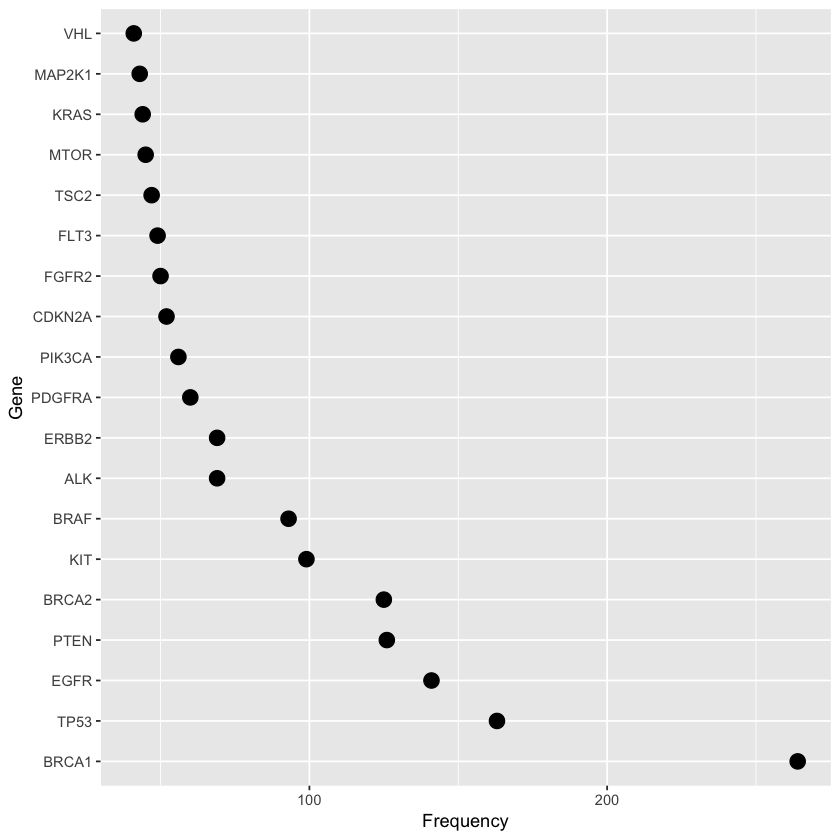

In [98]:
top_gene_train <- train %>%
  group_by(Gene) %>%
  summarise(ct = n()) %>%
  filter(ct > 40)

top_gene_train %>%
  ggplot(aes(reorder(Gene, -ct, FUN = min), ct)) +
  geom_point(size = 4) +
  labs(x = "Gene", y = "Frequency") + coord_flip()

In [100]:
test$Gene

[1] "CBL"     "CBL"     "SHOC2"   "DICER1"  "PTPRT"   "PTPRT"   "PTPRT"  
  [8] "RAD50"   "CCND3"   "TGFBR1"  "TGFBR2"  "MSH6"    "LATS1"   "SF3B1"  
 [15] "SF3B1"   "EGFR"    "EGFR"    "EGFR"    "EGFR"    "EGFR"    "EGFR"   
 [22] "EGFR"    "EGFR"    "EGFR"    "EGFR"    "EGFR"    "EGFR"    "EGFR"   
 [29] "EGFR"    "EGFR"    "EGFR"    "BRD4"    "CHEK2"   "TMPRSS2" "ELF3"   
 [36] "ROS1"    "ROS1"    "ASXL2"   "CDH1"    "EP300"   "TP53"    "TP53"   
 [43] "TP53"    "TP53"    "TP53"    "TP53"    "TP53"    "TP53"    "TP53"   
 [50] "TP53"    "TP53"    "TP53"    "TP53"    "TP53"    "TP53"    "TP53"   
 [57] "TP53"    "TP53"    "TP53"    "SMAD2"   "SMAD2"   "SMAD3"   "SMAD3"  
 [64] "SMAD4"   "SMAD4"   "SMAD4"   "SMAD4"   "AURKB"   "FBXW7"   "FBXW7"  
 [71] "CDKN1B"  "CDKN2A"  "CDKN2A"  "CDKN2A"  "CDKN2A"  "CDKN2A"  "CDKN2A" 
 [78] "ASXL1"   "ERBB2"   "ERBB2"   "ERBB2"   "ERBB2"   "ERBB2"   "ERBB2"  
 [85] "ERBB2"   "ERBB3"   "ERBB3"   "ERBB4"   "ERBB4"   "ERCC2"   "ERCC2"  
 [92] "BRIP1"   "ABL1"    "ABL1"    "ABL1"    "ERF"     "PDGFRA"  "PDGFRA" 
 [99] "PDGFRA"  "PDGFRA"  "PDGFRA"  "PDGFRA"  "PDGFRA"  "PDGFRB"  "PDGFRB" 
[106] "PDGFRB"  "ESR1"    "ESR1"    "ETV1"    "TSC1"    "TSC1"    "TSC1"   
[113] "TSC2"    "TSC2"    "TSC2"    "TSC2"    "TSC2"    "EWSR1"   "ACVR1"  
[120] "ARID1A"  "MDM4"    "AXIN2"   "BAP1"    "FANCA"   "MET"     "MET"    
[127] "MET"     "U2AF1"   "FAT1"    "PIK3CA"  "PIK3CA"  "PIK3CA"  "PIK3CA" 
[134] "PIK3CA"  "PIK3CA"  "PIK3CB"  "PIM1"    "YAP1"    "PIK3R1"  "PIK3R1" 
[141] "PIK3R2"  "HRAS"    "HRAS"    "HRAS"    "MLH1"    "MLH1"    "MLH1"   
[148] "MLH1"    "AKT1"    "AKT1"    "AKT1"    "AKT1"    "AKT2"    "FGFR1"  
[155] "FGFR3"   "FGFR3"   "FGFR3"   "FGFR3"   "SPOP"    "SPOP"    "SPOP"   
[162] "FGFR2"   "FGFR2"   "FGFR2"   "FGFR2"   "FGFR2"   "FGFR4"   "ALK"    
[169] "ALK"     "ALK"     "ALK"     "ALK"     "ALK"     "ALK"     "ALK"    
[176] "CARM1"   "VHL"     "VHL"     "VHL"     "VHL"     "MAP2K4"  "MAP2K4" 
[183] "FLT3"    "FLT3"    "FLT3"    "FLT3"    "FLT3"    "PMS2"    "PMS2"   
[190] "POLE"    "KNSTRN"  "APC"     "MSH2"    "MSH2"    "IDH1"    "IDH1"   
[197] "XRCC2"   "DIS3"    "AR"      "AR"      "ARAF"    "RHOA"    "PPP2R1A"
[204] "PPP2R1A" "IGF1R"   "CTCF"    "MTOR"    "MTOR"    "MTOR"    "MTOR"   
[211] "MTOR"    "SMARCA4" "SMO"     "SMO"     "CARD11"  "CARD11"  "ATM"    
[218] "NUP93"   "CTNNB1"  "CTNNB1"  "CTNNB1"  "MAP2K1"  "MAP2K1"  "MAP2K1" 
[225] "MAP2K1"  "MAP2K2"  "SPEN"    "MYC"     "SOX9"    "TET2"    "TET2"   
[232] "AGO2"    "CDK12"   "B2M"     "GATA3"   "CCND1"   "KEAP1"   "KEAP1"  
[239] "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"   
[246] "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"    "PTEN"   
[253] "BCOR"    "INPP4B"  "PRDM1"   "JAK1"    "JAK1"    "JAK2"    "JAK2"   
[260] "JAK2"    "JAK2"    "STK11"   "STK11"   "PTPN11"  "PTPN11"  "PTPN11" 
[267] "NF1"     "PTPRD"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"  
[274] "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"  
[281] "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"  
[288] "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"   "BRCA1"  
[295] "BRCA1"   "BRCA1"   "BRCA1"   "BRAF"    "BRAF"    "BRAF"    "BRAF"   
[302] "BRAF"    "BRAF"    "BRAF"    "BRAF"    "BRAF"    "BRAF"    "BRAF"   
[309] "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"  
[316] "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"   "BRCA2"  
[323] "NF2"     "NFE2L2"  "NFE2L2"  "GLI1"    "GNA11"   "GNAQ"    "KIT"    
[330] "KIT"     "KIT"     "KIT"     "KIT"     "KIT"     "KIT"     "KIT"    
[337] "KIT"     "KIT"     "KIT"     "MED12"   "NOTCH1"  "NOTCH1"  "NOTCH1" 
[344] "NOTCH1"  "DNMT3A"  "RAD51C"  "KRAS"    "KRAS"    "KRAS"    "KRAS"   
[351] "KRAS"    "RAF1"    "HNF1A"   "NRAS"    "NRAS"    "BCL2L11" "RB1"    
[358] "NTRK1"   "NTRK2"   "DDR2"    "SOX17"   "RET"     "RET"     "RET"    
[365] "RET"     "RET"     "RUNX1"   "RUNX1"

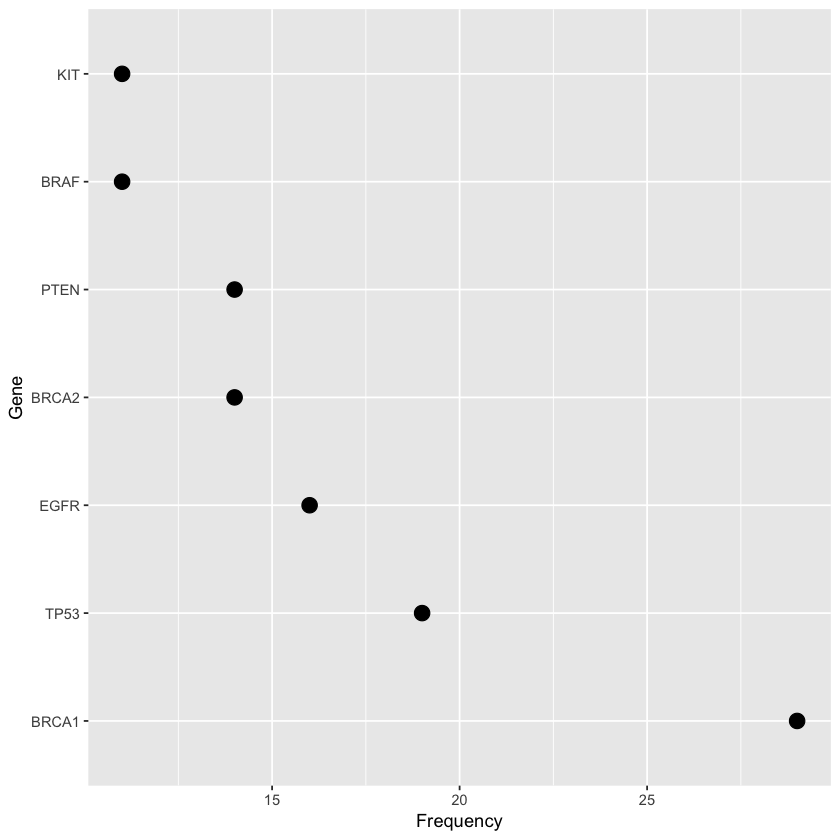

In [104]:
top_gene_test <- test %>%
  group_by(Gene) %>%
  summarise(ct = n()) %>%
  filter(ct > 10)

top_gene_test %>%
  ggplot(aes(reorder(Gene, -ct, FUN = min), ct)) +
  geom_point(size = 4) +
  labs(x = "Gene", y = "Frequency") +
  coord_flip()

Hmm, this plot does not agree with the one in the example.  It seems I don't have any Genes with frequency above 40, and the highest ones I do have don't match the example -- will investigate further (wrong data file accessed? data file changed?).  There were issues with loading the data (I had to explicitly add the column names) so maybe there is something missing in my setup.

Let's keep making some similar plots to get an idea of what's in the dataset:

Joining, by = c("Gene", "Variation", "set")
Warning message:
“Column `set` joining factors with different levels, coercing to character vector”

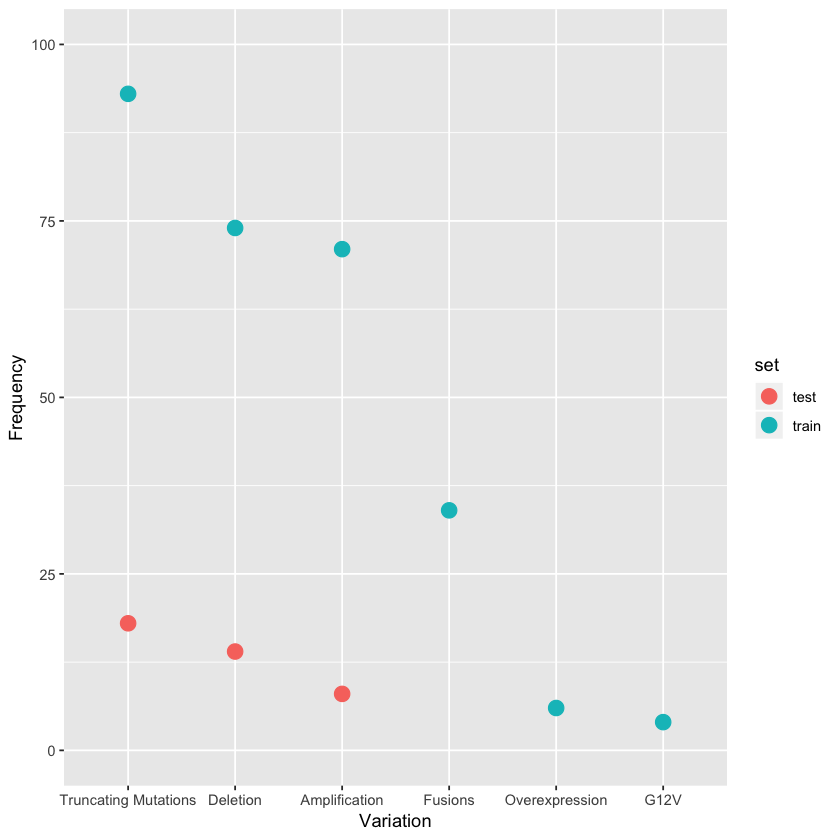

In [105]:
foo <- train %>% mutate(set = factor("train")) %>% select(-Class, -ID)
bar <- test %>% mutate(set = factor("test")) %>% select(-ID)

foo <- full_join(foo, bar)

foo %>%
  group_by(Variation, set) %>%
  summarise(ct = n()) %>%
  filter(ct > 3) %>%
  ggplot(aes(reorder(Variation, -ct, FUN = median), ct, colour = set)) +
  geom_point(size = 4) +
  coord_cartesian(ylim = c(0, 100)) +
  labs(x = "Variation", y = "Frequency")

Plot the class distributions:

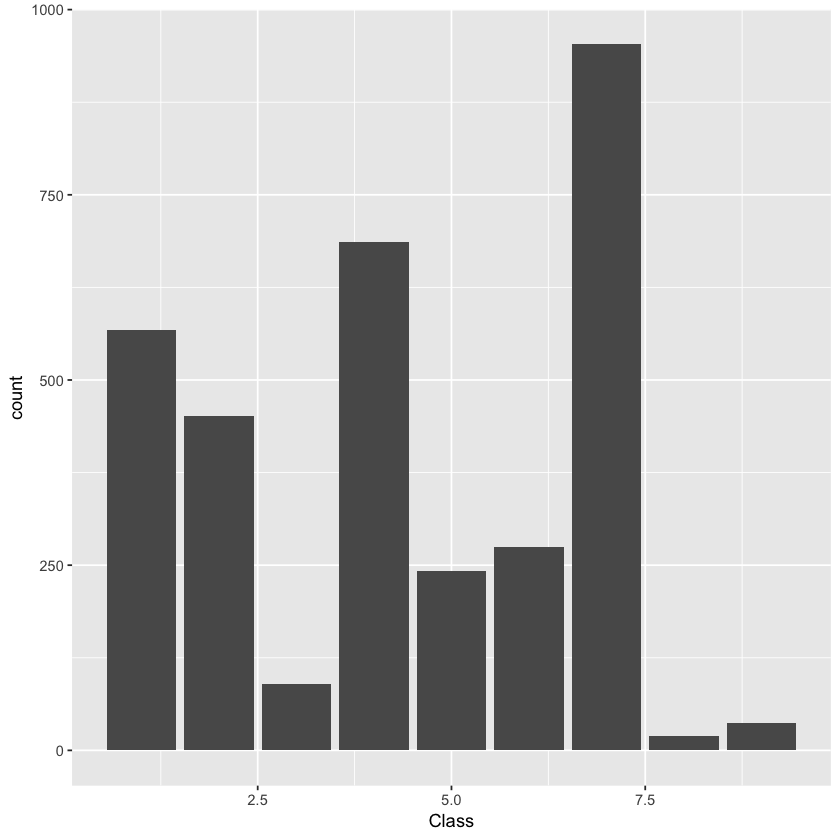

In [106]:
train %>%
  ggplot(aes(Class)) +
  geom_bar()

Gene vs Class!

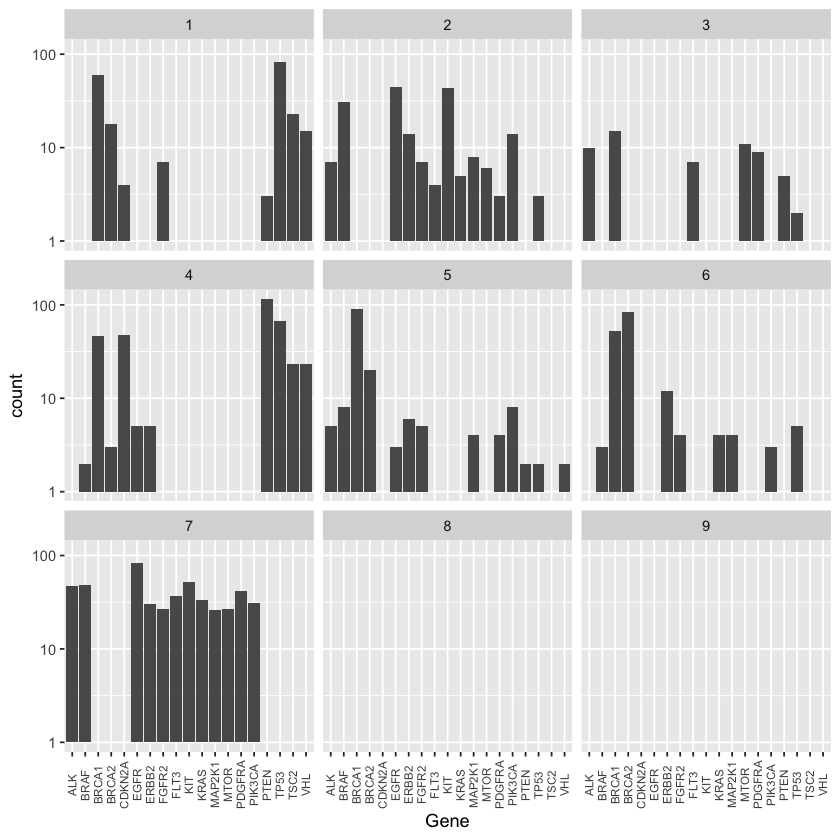

In [107]:
train %>%
  filter(Gene %in% str_c(top_gene$Gene)) %>%
  ggplot(aes(Gene)) +
  geom_bar() +
  scale_y_log10() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=7)) +
  facet_wrap(~ Class)

This plot is similar to what is in the example notebook.